In [136]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings("ignore")

## Business Understanding
Green taxi adalah salah satu kelompok lisensi/ aramada khusus dari NYC Taxi & Limousine Commission (TLC). Green Taxi hanya boleh beroperasi atau mengambil penumpang di borough luar Manhattan (Queens, Brooklyn, Bronx, Staten Island dan bagian utara Manhattan). Green taxi tidak boleh mengambil penumpang di pusat Manhattan kecuali dipesan via dispatch atau aplikasi. Seiring berjalanya waktu, muncul masalah baru ketika Green Taxi beroperasional yaitu Pendapatan Driver Fluktuatif dan cenderung rendah. 

## Problem Statement
“Pengemudi menghadapi tantangan dalam memaksimalkan pendapatan karena adanya variasi permintaan berdasarkan waktu, lokasi, serta faktor operasional seperti jarak, durasi, dan efisiensi perjalanan.” 

Objectives : 
-  1. Pola permintaan perjalanan berdasarkan waktu (jam, hari, bulan)
-  2. Menentukan pickup borough dan pickup zone yang tepat

Kedua objective ini dapat membantu pengemudi memaksimalkan pendapatan

In [137]:
df = pd.read_csv('/Users/wahyues/DS PWDK/capstone 2/NYC TLC Trip Record.csv')

In [138]:
df.head ()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [140]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [141]:
missing_count = df.isnull().sum()
missing_count

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [142]:
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100
missing_percentage

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

#  Cleaning Data

In [143]:
# Menghapus kolom 'ehail_fee' karena hampir semua nilainya hilang
# 'ehail_fee' relevan untuk layanan e-hail yang tidak tercatat di sini.
if 'ehail_fee' in df.columns:
    df = df.drop('ehail_fee', axis=1)

In [144]:
# Mengisi nilai hilang pada kolom 'store_and_fwd_flag' dengan 'N'
# Berdasarkan data dictionary, jika tidak ada koneksi, nilai default adalah 'N'.
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

In [145]:
# Mengisi nilai hilang pada kolom 'RatecodeID' dengan nilai yang paling sering muncul (mode)
# Ini adalah pendekatan yang wajar jika missing values tidak terlalu banyak
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

In [146]:
# Mengisi nilai hilang pada kolom 'payment_type' dengan '5' (Unknown)
# Sesuai dengan data dictionary, kode 5 berarti tidak diketahui.
df['payment_type'] = df['payment_type'].fillna(5)

In [147]:
# Menghapus baris di mana 'trip_distance' bernilai 0.0
# Perjalanan dengan jarak 0 mil umumnya tidak valid, mungkin dibatalkan.
df = df[df['trip_distance'] > 0]

In [148]:
# Menghapus baris di mana 'passenger_count' bernilai 0 atau lebih dari 6
# Kapasitas taksi biasanya tidak lebih dari 6 penumpang.
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

In [149]:
# Menghapus baris dengan nilai negatif pada kolom pendapatan
# Ini adalah data yang tidak valid secara logis.
df = df[df['fare_amount'] >= 0]
df = df[df['tip_amount'] >= 0]
df = df[df['total_amount'] >= 0]

In [150]:
# Mengubah kolom datetime ke format datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [151]:
# hitung durasi (menit)
df['trip_duration_min'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60


In [152]:
# Menghapus baris yang memiliki nilai hilang di kolom 'trip_type'
df = df.dropna(subset=['trip_type'])

In [153]:
df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration_min        0
dtype: int64

Berdasarkan analisis data, terdapat keterkaitan yang kuat antara payment_type, trip_type, dan congestion_surcharge. Nilai missing value yang sama, yaitu 4324, mengindikasikan bahwa baris-baris data tersebut memiliki pola yang sama.

*   Analisis Keterkaitan

*   Pola Nilai Hilang:

Jika ketiga kolom tersebut memiliki jumlah nilai hilang yang identik (4324), ini sangat mengisyaratkan bahwa baris yang sama yang memiliki nilai kosong pada ketiga kolom tersebut. Dengan kata lain, ketika payment_type kosong, trip_type dan congestion_surcharge juga kosong pada baris yang sama.

Keterkaitan ini menunjukkan bahwa data tersebut berasal dari jenis transaksi atau kondisi perjalanan tertentu yang tidak mencatat informasinya.

*   payment_type dan trip_type:

Berdasarkan (data dictionary) menjelaskan bahwa payment_type adalah kode numerik cara pembayaran, sedangkan trip_type adalah kode numerik untuk jenis perjalanan. Keduanya adalah data kategorikal yang diisi oleh sistem atau pengemudi.

Fakta bahwa keduanya hilang bersamaan menunjukkan kemungkinan adanya transaksi yang tidak tercatat dengan benar. Ini bisa terjadi pada perjalanan yang dibatalkan (Voided trip), perjalanan yang tidak dikenakan biaya (No charge), atau karena masalah teknis saat data dikirimkan.

*   congestion_surcharge:

congestion_surcharge adalah biaya tambahan yang dikenakan pada perjalanan di area padat lalu lintas (congestion zone). Biaya ini hanya berlaku untuk kondisi perjalanan tertentu.

Jika nilai ini hilang bersama dengan payment_type dan trip_type, ada kemungkinan baris tersebut adalah perjalanan yang tidak pernah memasuki zona kemacetan atau merupakan jenis perjalanan di mana biaya tersebut tidak berlaku.

# Statistik Deskriptif dan Identifikasi Outliers
Statistik Deskriptif

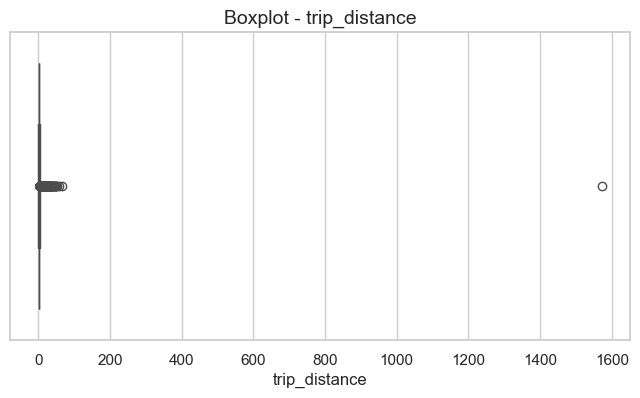

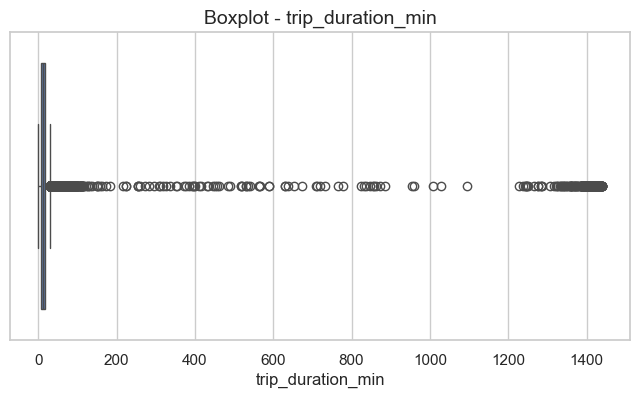

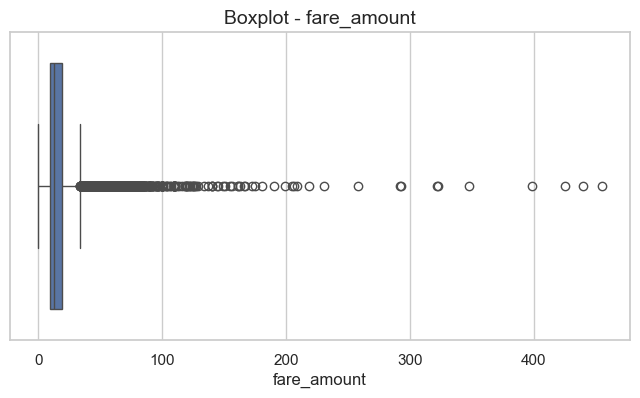

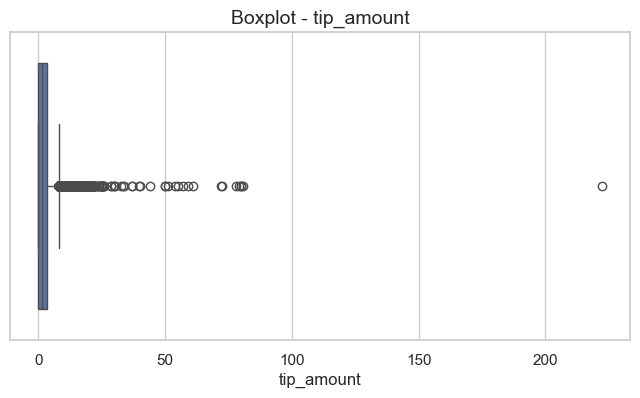

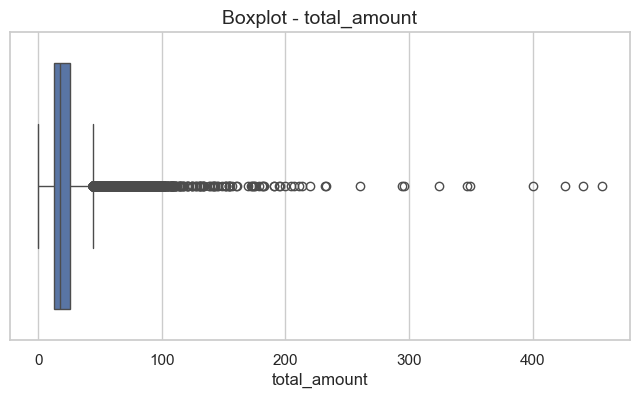

In [154]:
cols = ["trip_distance", "trip_duration_min", "fare_amount", "tip_amount", "total_amount"]

# Loop untuk setiap variabel
for col in cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}", fontsize=14)
    plt.xlabel(col)
    plt.show()


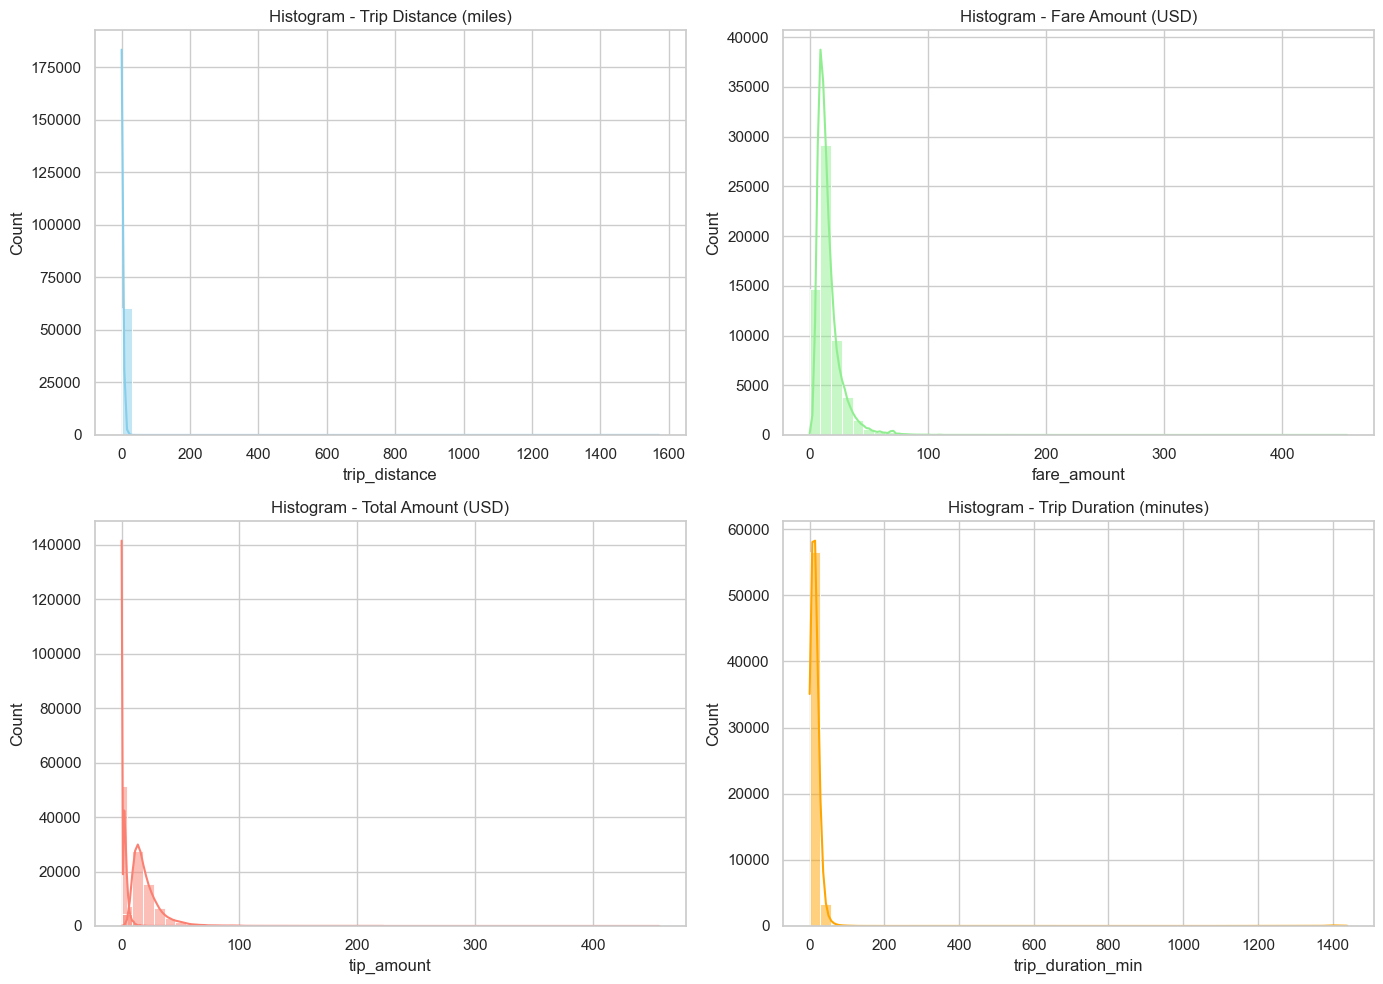

In [155]:
# Atur style
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Trip Distance
sns.histplot(df['trip_distance'], bins=50, kde=True, ax=axes[0,0], color="skyblue")
axes[0,0].set_title("Histogram - Trip Distance (miles)")

# Fare Amount
sns.histplot(df['fare_amount'], bins=50, kde=True, ax=axes[0,1], color="lightgreen")
axes[0,1].set_title("Histogram - Fare Amount (USD)")

# Tip Amount
sns.histplot(df['tip_amount'], bins=50, kde=True, ax=axes[1,0], color="salmon")
axes[1,0].set_title("Histogram - Tip Amount (USD)")

#Total Ammount
sns.histplot(df['total_amount'], bins=50, kde=True, ax=axes[1,0], color="salmon")
axes[1,0].set_title("Histogram - Total Amount (USD)")

# Trip Duration
sns.histplot(df['trip_duration_min'], bins=50, kde=True, ax=axes[1,1], color="orange")
axes[1,1].set_title("Histogram - Trip Duration (minutes)")

plt.tight_layout()
plt.show()


#  Kesimpulan Sementara
Semua variabel kuantitatif utama (distance, fare, tip, duration) menunjukkan distribusi miring ke kanan.
Terdapat nilai ekstrem/outliers yang signifikan, terutama pada trip distance dan trip duration.
Kehadiran outliers ini berpotensi memengaruhi hasil analisis dan model statistik, sehingga perlu dilakukan handling (misalnya filtering dengan metode IQR).

In [156]:
numeric_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_min']

df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Handling combined: capping outliers semua kolom sekaligus
    df_clean[col] = df_clean[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

# Cek apakah masih ada outliers
for col in numeric_cols:
    outliers = df_clean[(df_clean[col] < df_clean[col].quantile(0.25) - 1.5*(df_clean[col].quantile(0.75)-df_clean[col].quantile(0.25))) |
                        (df_clean[col] > df_clean[col].quantile(0.75) + 1.5*(df_clean[col].quantile(0.75)-df_clean[col].quantile(0.25)))]
    print(f"{col}: {len(outliers)} outliers")


trip_distance: 0 outliers
fare_amount: 0 outliers
tip_amount: 0 outliers
total_amount: 0 outliers
trip_duration_min: 0 outliers


Setelah dilakukan pembersihan menggunakan metode IQR (Interquartile Range) pada variabel trip_distance, fare_amount, dan total_amount, sekitar 3.7% data terhapus. Sebagian besar outliers ditemukan pada trip_distance (3.27%), sedangkan pada fare_amount (0.76%) dan total_amount (0.19%) relatif kecil.


Dengan penghapusan outliers ini, distribusi data menjadi lebih representatif dan tidak lagi dipengaruhi oleh nilai ekstrim yang dapat mendistorsi analisis. Hasil ini membuat interpretasi statistik (misalnya mean, median, dan visualisasi distribusi) menjadi lebih stabil dan mencerminkan kondisi mayoritas perjalanan secara lebih akurat.

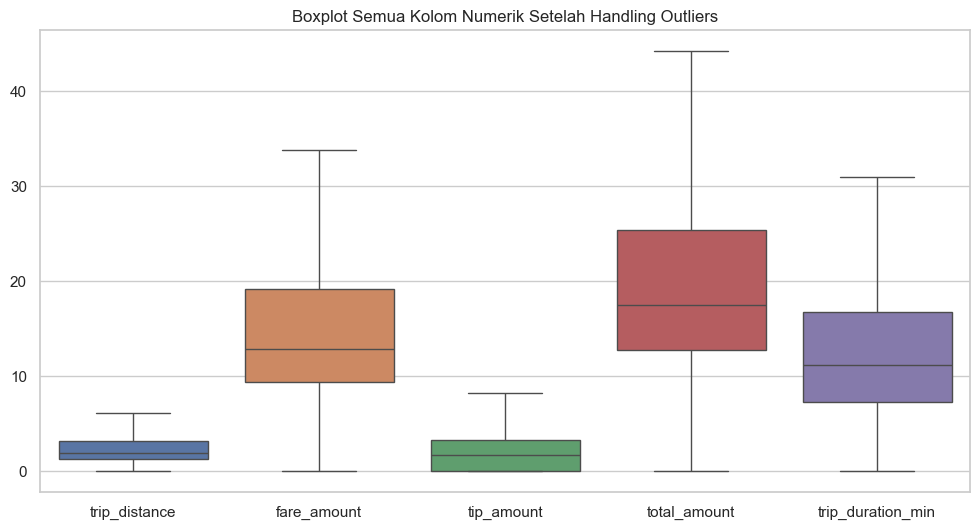

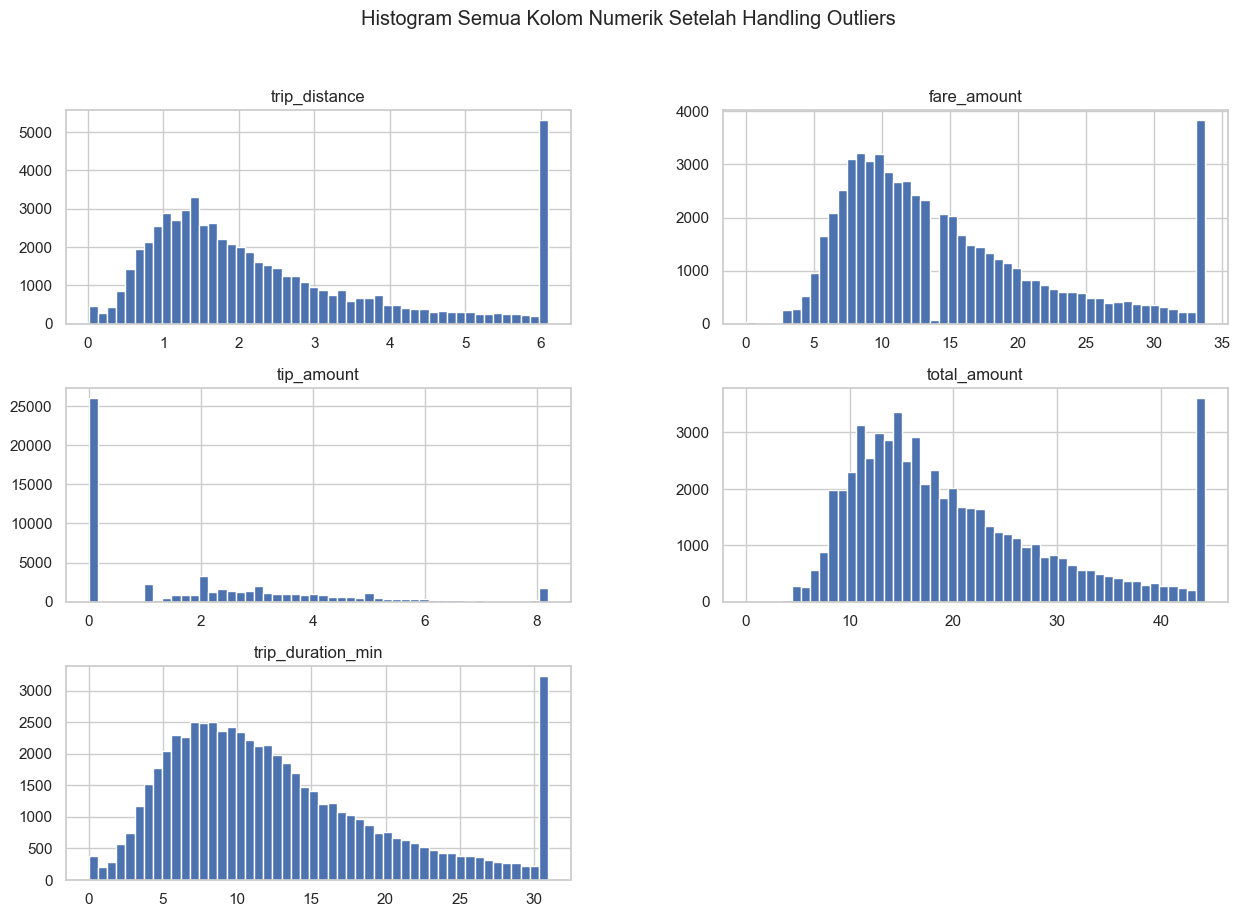

In [157]:
# kolom numerik yang sudah di-handle
numeric_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_min']

# BOXPLOT untuk semua kolom numerik
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[numeric_cols])
plt.title("Boxplot Semua Kolom Numerik Setelah Handling Outliers")
plt.show()

# HISTOGRAM untuk semua kolom numerik
df_clean[numeric_cols].hist(bins=50, figsize=(15,10))
plt.suptitle("Histogram Semua Kolom Numerik Setelah Handling Outliers")
plt.show()


Berdasarkan Grafik diatas dapat diambil informasi bahwa

-  Trip Distance


Mayoritas perjalanan memiliki jarak tempuh pendek, berkisar antara 1–3 mil. Hal ini menunjukkan bahwa sebagian besar layanan taksi digunakan untuk perjalanan dalam kota jarak dekat.


-  Fare Amount


Sebagian besar tarif perjalanan berada pada kisaran $8–$15. Distribusi cenderung condong ke kanan, dengan sejumlah kecil perjalanan yang memiliki tarif lebih tinggi, namun sudah dicapping agar tidak mendominasi analisis.


-  Total Amount


Ketika digabungkan dengan tip dan surcharge, mayoritas total pembayaran pelanggan berada pada kisaran $10–$20. Polanya relatif mirip dengan fare amount, namun dengan nilai rata-rata yang sedikit lebih tinggi.


-  Tip Amount


Sebagian besar pelanggan tidak memberikan tip (nilai tip = $0). Namun, terdapat distribusi tip kecil (sekitar $1–$3) dan hanya sebagian kecil yang memberikan tip lebih besar.


-  Trip Duration


Lama perjalanan didominasi oleh durasi 5–15 menit, yang konsisten dengan pola perjalanan jarak pendek di area perkotaan.

In [158]:
df.to_csv('Capstone_DataAnalysisTaxiNYC.csv', index=False)
print("File berhasil disimpan")

File berhasil disimpan


# EDA 

In [159]:
# Ringkasan statistik
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
VendorID,60274.0,NaN,NaN,NaN,1.876779,1.0,2.0,2.0,2.0,2.0,0.328693
lpep_pickup_datetime,60274,NaN,NaN,NaN,2023-01-16 20:58:46.682367232,2009-01-01 20:21:27,2023-01-09 12:37:23.249999872,2023-01-17 09:20:14,2023-01-24 16:36:21.750000128,2023-02-01 03:10:05,NaN
lpep_dropoff_datetime,60274,NaN,NaN,NaN,2023-01-16 21:16:47.998755840,2009-01-02 11:07:31,2023-01-09 12:53:00.500000,2023-01-17 09:37:53,2023-01-24 16:53:31.500000,2023-02-01 17:27:05,NaN
store_and_fwd_flag,60274,2,N,60030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RatecodeID,60274.0,NaN,NaN,NaN,1.068919,1.0,1.0,1.0,1.0,5.0,0.510337
PULocationID,60274.0,NaN,NaN,NaN,96.396904,3.0,74.0,75.0,112.0,265.0,58.608011
DOLocationID,60274.0,NaN,NaN,NaN,138.158543,1.0,74.0,138.0,223.0,265.0,76.583095
passenger_count,60274.0,NaN,NaN,NaN,1.33132,1.0,1.0,1.0,1.0,6.0,0.989614
trip_distance,60274.0,NaN,NaN,NaN,2.716416,0.01,1.2,1.89,3.16,1571.97,6.928305
fare_amount,60274.0,NaN,NaN,NaN,15.92844,0.0,9.3,12.8,19.1,455.0,12.170841


In [160]:
# Rename jadi nama standar
df = df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime',
                        'lpep_dropoff_datetime': 'dropoff_datetime'})

# Pastikan tipe datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], errors='coerce')

# Fitur waktu
df['pickup_hour']  = df['pickup_datetime'].dt.hour
df['pickup_day']   = df['pickup_datetime'].dt.dayofweek   # 0=Senin, 6=Minggu
df['pickup_month'] = df['pickup_datetime'].dt.month


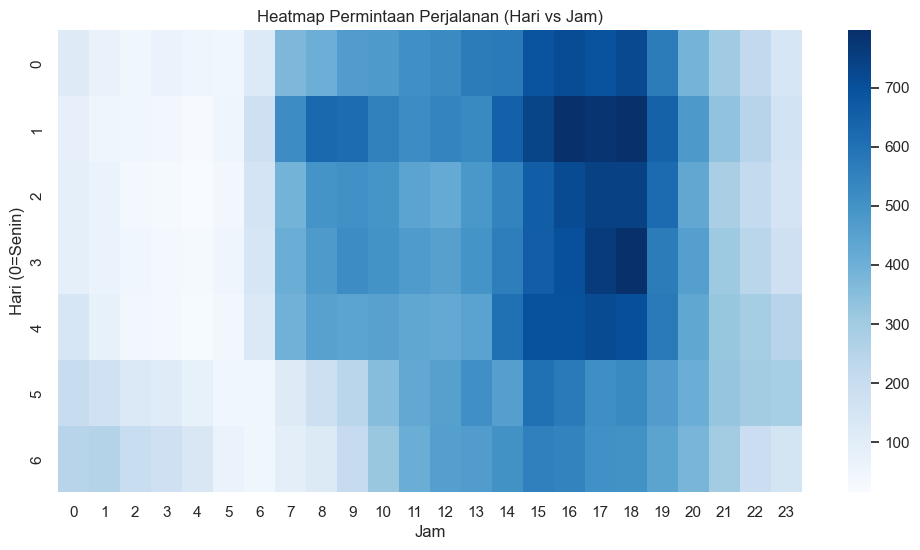

In [161]:
#1. Pola permintaan perjalanan berdasarkan waktu (jam, hari, bulan)
# Extract time features
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.dayofweek   # 0=Senin
df['pickup_month'] = df['pickup_datetime'].dt.month

demand_matrix = df.groupby(['pickup_day','pickup_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(demand_matrix, cmap="Blues")
plt.title("Heatmap Permintaan Perjalanan (Hari vs Jam)")
plt.xlabel("Jam")
plt.ylabel("Hari (0=Senin)")
plt.show()


In [162]:
# merge kolom pulocationid dan dolocationid dari taxi zone looukp
df_zones = pd.read_csv('/Users/wahyues/DS PWDK/capstone 2/taxi_zone_lookup.csv')

In [163]:
pd.set_option("display.max_rows", 100)

In [164]:
df_zones.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [165]:
df = pd.merge(df, df_zones, left_on='DOLocationID', right_on='LocationID')

In [166]:
df = pd.merge(df, df_zones, left_on='PULocationID', right_on='LocationID')

In [167]:
df

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,pickup_day,pickup_month,LocationID_x,Borough_x,Zone_x,service_zone_x,LocationID_y,Borough_y,Zone_y,service_zone_y
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,6,1,143,Manhattan,Lincoln Square West,Yellow Zone,166,Manhattan,Morningside Heights,Boro Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,6,1,43,Manhattan,Central Park,Yellow Zone,24,Manhattan,Bloomingdale,Yellow Zone
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,6,1,238,Manhattan,Upper West Side North,Yellow Zone,41,Manhattan,Central Harlem,Boro Zone
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,6,1,74,Manhattan,East Harlem North,Boro Zone,41,Manhattan,Central Harlem,Boro Zone
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,6,1,262,Manhattan,Yorkville East,Yellow Zone,41,Manhattan,Central Harlem,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60269,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,1,1,205,Queens,Saint Albans,Boro Zone,130,Queens,Jamaica,Boro Zone
60270,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1,1,181,Brooklyn,Park Slope,Boro Zone,65,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone
60271,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1,1,116,Manhattan,Hamilton Heights,Boro Zone,244,Manhattan,Washington Heights South,Boro Zone
60272,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1,1,238,Manhattan,Upper West Side North,Yellow Zone,74,Manhattan,East Harlem North,Boro Zone


In [169]:
df.drop(columns=['LocationID_y','service_zone_y'], inplace=True)

In [170]:
df.rename(columns={'Borough_x': 'pickup_borough', 'Zone_y':'pickup_zone'}, inplace=True)

In [171]:
df

,VendorID,pickup_datetime,dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_duration_min,pickup_hour,pickup_day,pickup_month,LocationID_x,pickup_borough,Zone_x,service_zone_x,Borough_y,pickup_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,11.016667,0,6,1,143,Manhattan,Lincoln Square West,Yellow Zone,Manhattan,Morningside Heights
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,6.766667,0,6,1,43,Manhattan,Central Park,Yellow Zone,Manhattan,Bloomingdale
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,5.816667,0,6,1,238,Manhattan,Upper West Side North,Yellow Zone,Manhattan,Central Harlem
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,5.966667,0,6,1,74,Manhattan,East Harlem North,Boro Zone,Manhattan,Central Harlem
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,17.550000,0,6,1,262,Manhattan,Yorkville East,Yellow Zone,Manhattan,Central Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60269,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,7.983333,23,1,1,205,Queens,Saint Albans,Boro Zone,Queens,Jamaica
60270,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,10.750000,23,1,1,181,Brooklyn,Park Slope,Boro Zone,Brooklyn,Downtown Brooklyn/MetroTech
60271,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,6.016667,23,1,1,116,Manhattan,Hamilton Heights,Boro Zone,Manhattan,Washington Heights South
60272,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,9.533333,23,1,1,238,Manhattan,Upper West Side North,Yellow Zone,Manhattan,East Harlem North


<Axes: xlabel='pickup_borough', ylabel='count'>

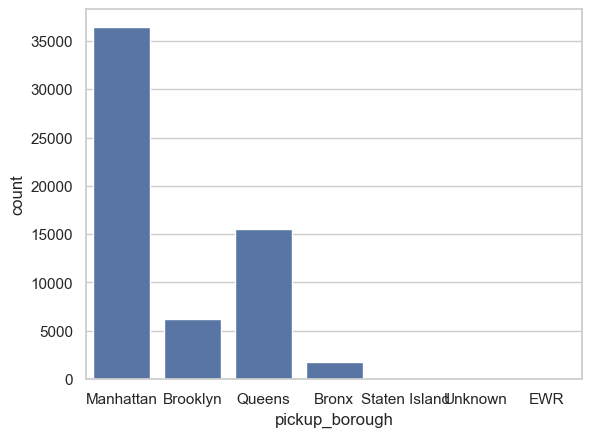

In [172]:
sns.countplot(df, x='pickup_borough')

dar 6 pickup borough terdapat 3 yang tertinggi, Manhatan menjadi puncak diikuti Queen dan Brooklyn

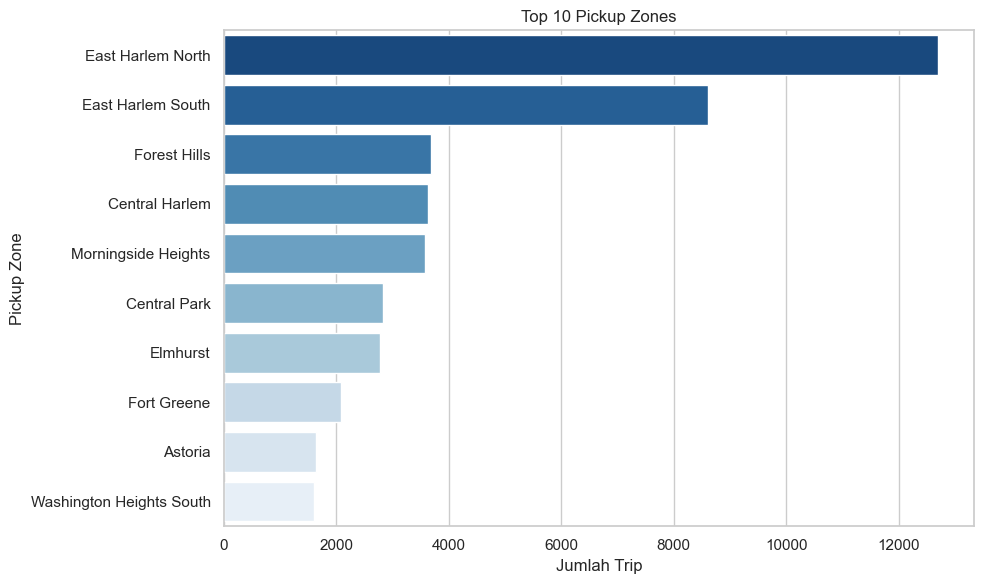

In [173]:
# Hitung top 10 pickup zone
top_10_pickup = (
    df.groupby('pickup_zone')
      .size()
      .reset_index(name='Jumlah_Trip')
      .sort_values(by='Jumlah_Trip', ascending=False)
      .head(10)
)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_pickup,
    y='pickup_zone',
    x='Jumlah_Trip',
    palette='Blues_r'
)
plt.title("Top 10 Pickup Zones")
plt.xlabel("Jumlah Trip")
plt.ylabel("Pickup Zone")
plt.tight_layout()
plt.show()


Dari tabel bisa didaptkan informasi bahwa East Harlem North dan East Harlem South menjadi pick up zone terbanyak dari 10 top pick up zone

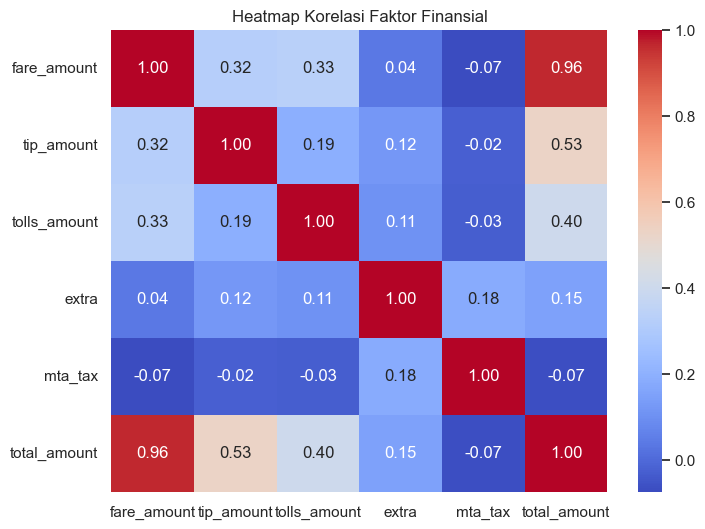

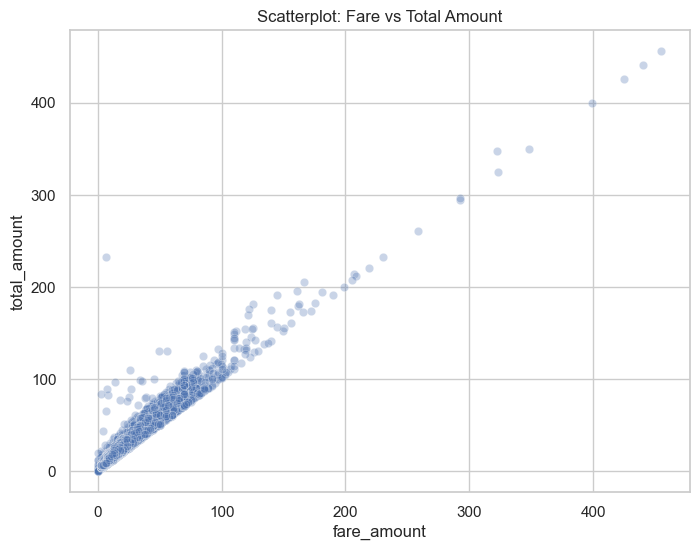

In [174]:
# Faktor finansial (tarif, metode pembayaran)
# Heatmap finansial
fin_cols = ["fare_amount","tip_amount","tolls_amount","extra","mta_tax","total_amount"]
plt.figure(figsize=(8,6))
sns.heatmap(df[fin_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Faktor Finansial")
plt.show()

# Scatterplot fare vs total
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="fare_amount", y="total_amount", alpha=0.3)
plt.title("Scatterplot: Fare vs Total Amount")
plt.show()


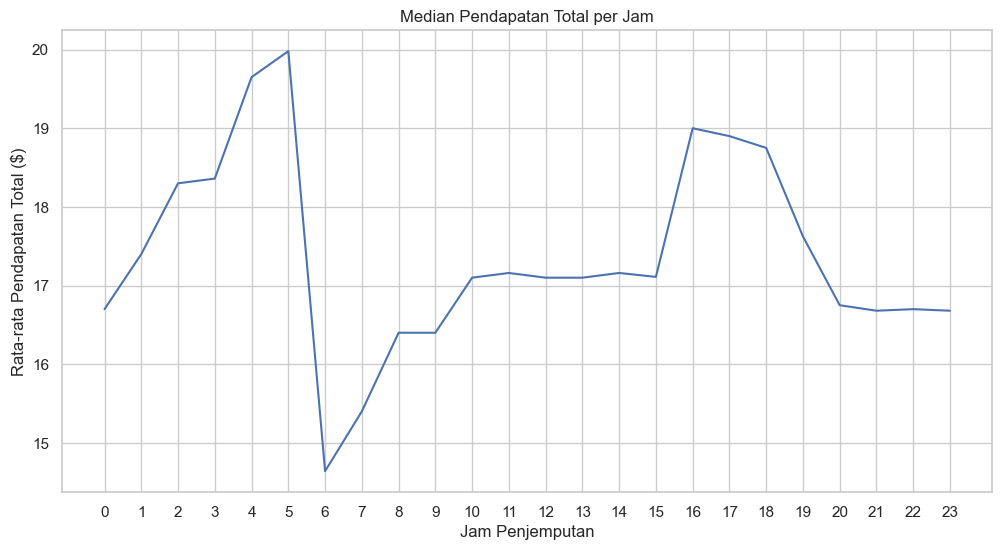

In [175]:
# # Visualisasi Tren Pendapatan
# # Hitung rata-rata pendapatan per jam
hourly_revenue = df.groupby('pickup_hour')['total_amount'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='total_amount', data=hourly_revenue)
plt.title('Median Pendapatan Total per Jam')
plt.xlabel('Jam Penjemputan')
plt.ylabel('Rata-rata Pendapatan Total ($)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Didapatkan informasi dari grafik bahwa Pendapatan tertinggi ada pada waktu pagi antara jam 4 - 5 kemudian waktu sore antara jam 3 sore - 20 malam. Ini terjadi bisa karena waktu orang beraktivitas beriringan waktu orang berangkat dan pulang kerja

# UJI STATISTIK 
 
Objective 1 (Waktu vs Jumlah Perjalanan / Pendapatan)


-  Data: variabel waktu (jam/hari/bulan) → kategorikal, variabel outcome (jumlah trip / total pendapatan) → numerik.


-  Uji yang cocok:
ANOVA / Kruskal-Wallis → untuk cek apakah ada perbedaan signifikan rata-rata jumlah perjalanan/pendapatan antar jam/hari/bulan.
Kalau datanya tidak normal → pakai Kruskal-Wallis (non-parametrik).


-Tambahan: Chi-Square Test of Independence bisa dipakai kalau yang dibandingkan adalah frekuensi (contoh: distribusi trip per hari).


Objective 2 (Lokasi Pickup & Dropoff)

-  Data: lokasi (PUlocationID / DOlocationID) → kategorikal, outcome (jumlah trip atau pendapatan).

-  Uji yang cocok:

-Chi-Square Test → untuk melihat apakah distribusi pickup/drop-off berbeda signifikan antar lokasi.
Kalau mau lihat rata-rata pendapatan per lokasi → bisa pakai ANOVA / Kruskal-Wallis.

In [ ]:
# Pastikan kolom datetime dalam format datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Tambahkan kolom waktu turunan
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.dayofweek   # 0=Senin
df['month'] = df['pickup_datetime'].dt.month

# Outcome yang akan diuji (jumlah trip = frekuensi, atau total pendapatan = total_amount)
# Kita bisa pilih salah satu, contoh di sini: total_amount


In [ ]:
# Objective 1  Pola permintaan berdasarkan waktu
# Fungsi bantu untuk uji statistik
def test_time_anova(df, time_col, value_col="total_amount"):
    groups = [group[value_col].values for name, group in df.groupby(time_col)]
    
    # Cek normalitas (Shapiro-Wilk untuk 1 grup random)
    _, p_normal = stats.shapiro(df[value_col].sample(500))  # sample biar cepat
    
    if p_normal > 0.05:
        # Kalau data normal, pakai ANOVA
        stat, p = stats.f_oneway(*groups)
        test_used = "ANOVA"
    else:
        # Kalau tidak normal, pakai Kruskal-Wallis
        stat, p = stats.kruskal(*groups)
        test_used = "Kruskal-Wallis"
    
    return test_used, stat, p

# Uji per jam
print("=== Uji Perbedaan Jumlah Pendapatan Berdasarkan Jam ===")
print(test_time_anova(df, "hour"))

# Uji per hari
print("=== Uji Perbedaan Jumlah Pendapatan Berdasarkan Hari ===")
print(test_time_anova(df, "day"))

# Uji per bulan
print("=== Uji Perbedaan Jumlah Pendapatan Berdasarkan Bulan ===")
print(test_time_anova(df, "month"))


=== Uji Perbedaan Jumlah Pendapatan Berdasarkan Jam ===
('Kruskal-Wallis', 633.4871103405181, 4.330322110801829e-119)
=== Uji Perbedaan Jumlah Pendapatan Berdasarkan Hari ===
('Kruskal-Wallis', 41.463105256755256, 2.3467738719966465e-07)
=== Uji Perbedaan Jumlah Pendapatan Berdasarkan Bulan ===
('Kruskal-Wallis', 2.5507926222854524, 0.2793202485562461)


Hasil Uji Statistik Objective 1
Perbedaan Pendapatan Berdasarkan Jam (hour)
-  Uji: Kruskal-Wallis
-  Statistik = 633.49, p-value = 4.33e-119 (≪ 0.05)
-  Ada perbedaan signifikan rata-rata pendapatan antar jam.
-  → Artinya, jam pengambilan order memang sangat memengaruhi pendapatan.


Perbedaan Pendapatan Berdasarkan Hari (day)
-  Uji: Kruskal-Wallis
-  Statistik = 41.46, p-value = 2.34e-07 (≪ 0.05)
-  Ada perbedaan signifikan rata-rata pendapatan antar hari.
-  → Artinya, hari dalam seminggu juga berpengaruh terhadap pendapatan.


Perbedaan Pendapatan Berdasarkan Bulan (month)
-  Uji: Kruskal-Wallis
-  Statistik = 2.55, p-value = 0.279 (> 0.05)
-  Tidak ada perbedaan signifikan antar bulan.
→ Artinya, pola bulanan relatif stabil, tidak terlalu memengaruhi pendapatan.

Hasil uji Kruskal-Wallis menunjukkan bahwa terdapat perbedaan signifikan dalam pendapatan berdasarkan jam dan hari perjalanan, namun tidak terdapat perbedaan signifikan antar bulan. Hal ini mengindikasikan bahwa waktu (jam dan hari) merupakan faktor penting yang memengaruhi pendapatan pengemudi, sedangkan variasi bulanan cenderung stabil. Dengan kata lain, strategi pengemudi dalam memilih jam dan hari kerja berpotensi lebih berdampak pada pendapatan dibandingkan pemilihan bulan.

In [ ]:
#Objectives 2 : Lokasi Pickup & DroppOff
#Chis-square Test
# Hitung frekuensi lokasi pickup & dropoff
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Gabungkan ke dalam 1 dataframe
location_df = pd.DataFrame({
    "pickup": pickup_counts,
    "dropoff": dropoff_counts
}).fillna(0)

# Uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(location_df.T)

print("=== Uji Chi-Square Pickup vs Dropoff ===")
print("Chi2:", chi2, "p-value:", p)

if p < 0.05:
    print("Ada perbedaan signifikan distribusi pickup dan dropoff antar lokasi.")
else:
    print("Tidak ada perbedaan signifikan distribusi pickup dan dropoff antar lokasi.")


=== Uji Chi-Square Pickup vs Dropoff ===
Chi2: 41110.356535241015 p-value: 0.0
Ada perbedaan signifikan distribusi pickup dan dropoff antar lokasi.


Hasil uji Chi-Square menunjukkan adanya perbedaan signifikan pada distribusi lokasi pickup dan dropoff. Hal ini berarti tidak semua lokasi memiliki produktivitas yang sama — terdapat lokasi tertentu yang menjadi pusat aktivitas perjalanan (hotspot), sementara lokasi lainnya relatif jarang digunakan. Temuan ini penting untuk menentukan lokasi yang paling strategis bagi pengemudi dalam memaksimalkan pendapatan.

# INSIGHT SEMENTARAAAA

-  Jam & hari → signifikan → pengemudi sebaiknya fokus di jam/hari tertentu.
-  Bulan → tidak signifikan → pola pendapatan stabil sepanjang bulan.
-  Lokasi → signifikan → ada hotspot pickup/dropoff → bisa direkomendasikan ke driver.

# REKOMENDASI

-  Fokus bekerja di jam sibuk (misalnya 7–9 pagi & 5–8 malam).
-  Pilih hari kerja tertentu (misalnya akhir pekan lebih rame atau weekday tertentu).
-  Targetkan lokasi pickup/dropoff tertentu (hotspot).